# Устойчивость (От Максима и Газиза)

### Задача:

#### На двумерной сетке задан шаблон в виде сдвигов индексов точек. Кроме того, даны коэффициенты численной схемы. Проверить схему на устойчивость/неустойчивость. Можно использовать библиотечные функции `numpy` и `scipy.optimize`.

#### Примечание: функция `numpy.polynomial.polynomial.polyroots` может оказаться крайне полезной.

### Подключение библиотек:

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from itertools import groupby

### Реализация кода:

# $ u^n_j = \lambda^n e^{i\alpha j}$

In [63]:
# Функция, высчитывающая многочлен для отдельного e^(i*альфа)
def poly(equation, alpha):
    return_equation = [0] * (abs(int(np.transpose(equation)[0][-1])) + 1)
    num_zero = 0
    k = 0
    range_array = [el for el, _ in groupby(np.transpose(equation)[0])]
    # range_array = range(len(return_equation))
    for i in range_array:
        while equation[num_zero][0] == i:
            return_equation[k] += equation[num_zero][2] * np.exp(alpha*1j)**(equation[num_zero][1])
            num_zero += 1
            if num_zero > len(return_equation):
                break
        k += 1
    return return_equation

# Собственно, isStable, isn'tStable?
def isStable(template, scheme):
    # Рисуем схему
    labels = [0] * len(template)
    for i in range(len(template)):
        if template[i][1] == 0:
            labels[i] = "(n"
        elif template[i][1] < 0:
            labels[i] = "(n - " + str(-template[i][1])
        else:
            labels[i] = "(n + " + str(template[i][1])
        if template[i][0] == 0:
            labels[i] += ", j)"
        elif template[i][0] < 0:
            labels[i] += ", j - " + str(-template[i][0]) + ")"
        else:
            labels[i] += ", j + " + str(template[i][0]) + ")"
    labels = np.transpose(labels)
    points = np.transpose(template)
    for i, txt in enumerate(labels):
        plt.annotate(txt, (points[0][i] + 0.03, points[1][i] + 0.03), fontsize = 12)
    for i in range(len(points[0])):
        for k in range(len(points[1])):
            if points[1][i] == points[1][k] or points[0][i] == points[0][k]:
                plt.plot([points[0][i], points[0][k]], [points[1][i], points[1][k]], c = "red")
    plt.scatter(points[0], points[1], s = 160, c = "red")
    plt.axis("equal")
    plt.axis("off")
    plt.show()
    
    # Делаем массив данных поудобнее
    equation = [[0] * 3 for i in range(len(template))]
    for i in range(len(equation)):
        equation[i] = [template[i][1], template[i][0], scheme[i]]
    equation.sort(key = lambda a: a[0])
    
    # Печатаем "границы" лямбды (её крайние значения)
    lambda_answer = []
    alpha_answer = []
    for alpha in np.linspace(0 - 1, 2*np.pi + 1, 400): # Тут -1 и +1 для красоты
        lambda_answer.append(np.polynomial.polynomial.polyroots(poly(equation, alpha)))
        alpha_answer.append(alpha)
    count = True
    maximum = 0              
    _, ax = plt.subplots()
    for i in range(len(lambda_answer)):
        for k in range(len(lambda_answer[i])):
            ax.scatter(alpha_answer[i], abs(lambda_answer[i][k]), s = 10, c = "blue")
            if abs(lambda_answer[i][k]) > 1:
                count = False
            if abs(lambda_answer[i][k]) > maximum:
                maximum = abs(lambda_answer[i][k])
    ax.set_xlabel("α", fontsize = 20)
    ax.set_ylabel("$\lambda$", fontsize = 20)
    plt.ylim([-1, maximum + 1])
    if count:
        plt.fill_between(alpha_answer, [0] * len(alpha_answer), [1] * len(alpha_answer), color = "green", alpha = 0.2)
        return True
    else:
        plt.fill_between(alpha_answer, [0] * len(alpha_answer), [1] * len(alpha_answer), color = "red", alpha = 0.2)
        return False

### Пример:

C = 0.5


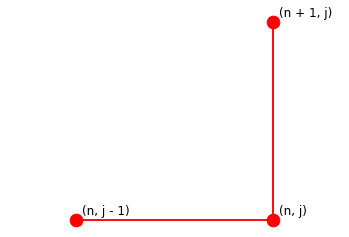

System is Stable


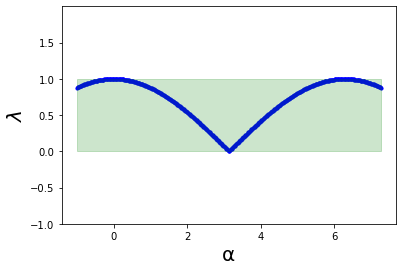

In [64]:
hx, ht = 1., 1.
a = 0.5
C = a * ht / hx
print("C =", C)
scheme = (1/ht, -a/hx, a/hx - 1/ht)  #1, -1, 0
template = (         (0, 1),
            (-1, 0), (0, 0))

stab = isStable(template, scheme)
print("System is Stable" if stab else "System is Unstable") # Stable

### Пример 2:

C = 1.0


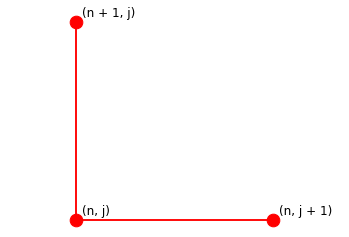

System is Unstable


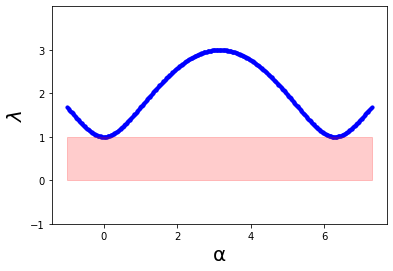

In [65]:
hx, ht = 1., 1.
a = 1.
C = a * ht / hx
print("C =", C)
scheme = (1/ht, a/hx, -a/hx - 1/ht)
template = ((1, 0), (0, 1), (0, 0))

stab = isStable(template, scheme)
print("System is Stable" if stab else "System is Unstable") # Stable

### Пример 3:

C = 0.5


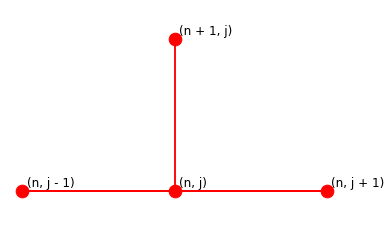

System is Unstable


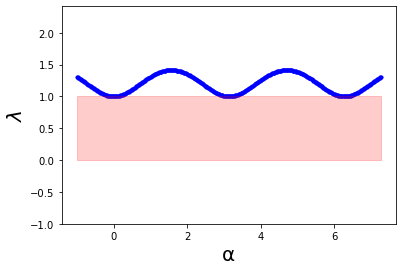

In [66]:
hx, ht = 1., 1.
a = 0.5
C = a * ht / hx
print("C =", C)
scheme = (-1/(2*hx), -1/ht, 1/(2*hx), 1/ht) #1, -1, 0
template = ((-1, 0),(0, 0),(1, 0),(0,1))

stab = isStable(template, scheme)
print("System is Stable" if stab else "System is Unstable") # Stable

C = 0.25


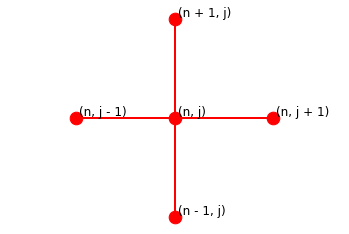

System is Stable


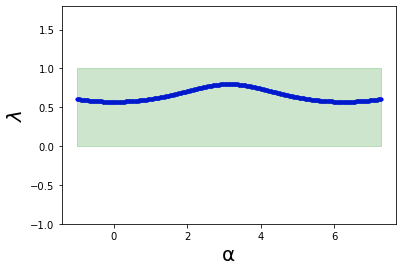

In [71]:
hx, ht = 1., 1.
a = 0.25
C = a * ht / hx
print("C =", C)
scheme = (-a/hx**2, -2/ht**2 + 2*a/hx**2, 1/ht**2, -a/hx**2, 1/ht**2) #1, -1, 0
template = ((-1,0), (0,0), (1,0), (0,1), (0,-1))

stab = isStable(template, scheme)
print("System is Stable" if stab else "System is Unstable") # Stable